In [1]:
df.train <- read.csv('titanic_train.csv')

In [2]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
class(df.train)

[1] "data.frame"

In [4]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
colSums(is.na(df.train))
#or
sapply(df.train,function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [6]:
df.train <- lapply(df.train, function(x) type.convert(as.character(x),na.string=''))

In [7]:
df.train <- as.data.frame(df.train)

In [8]:
colSums(is.na(df.train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

In [9]:
#DATA CLEANING

In [10]:
library(ggplot2)

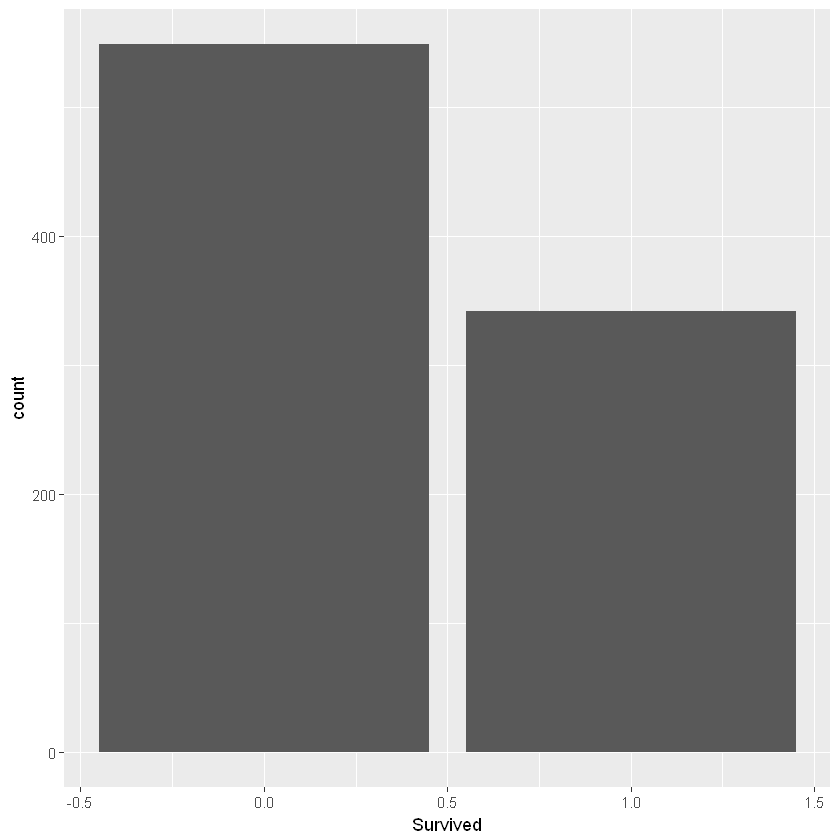

In [11]:
ggplot(df.train,aes(Survived))+geom_bar()

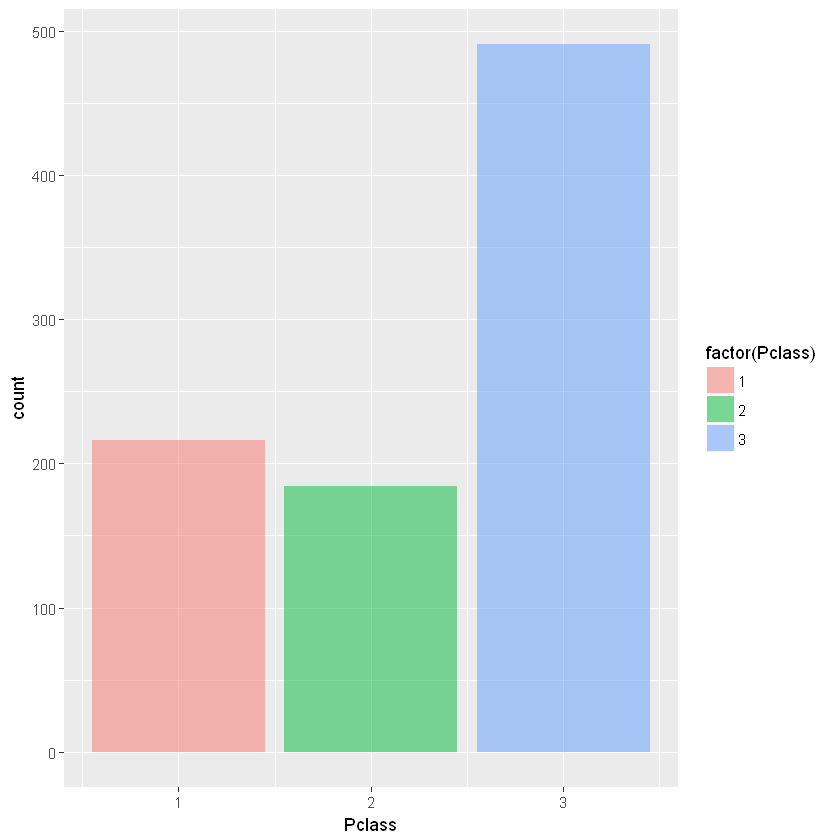

In [12]:
ggplot(df.train,aes(Pclass))+geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

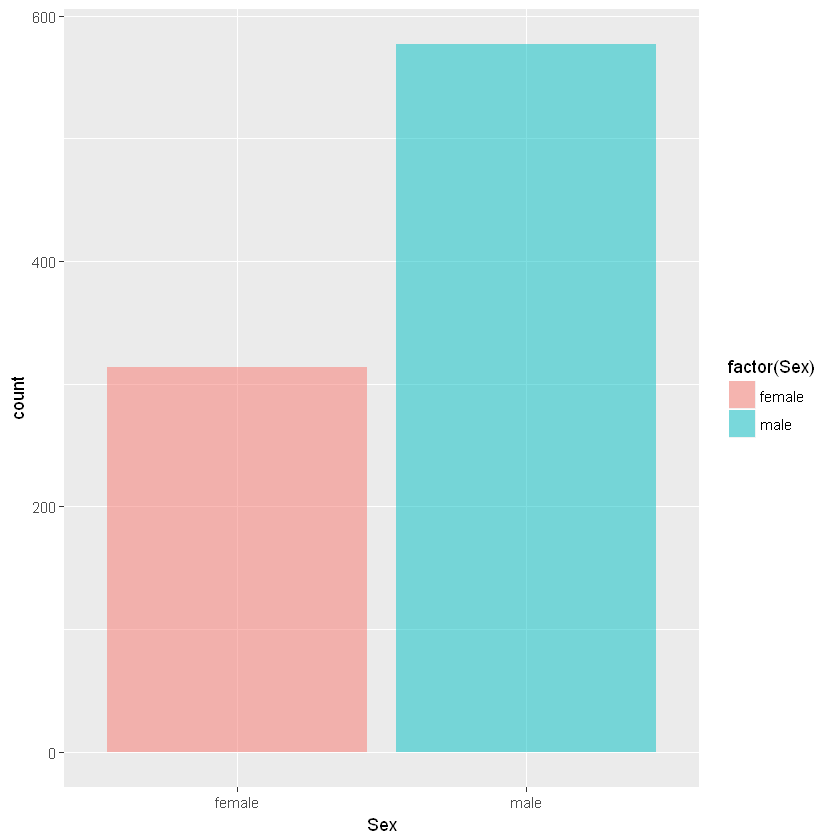

In [13]:
ggplot(df.train,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

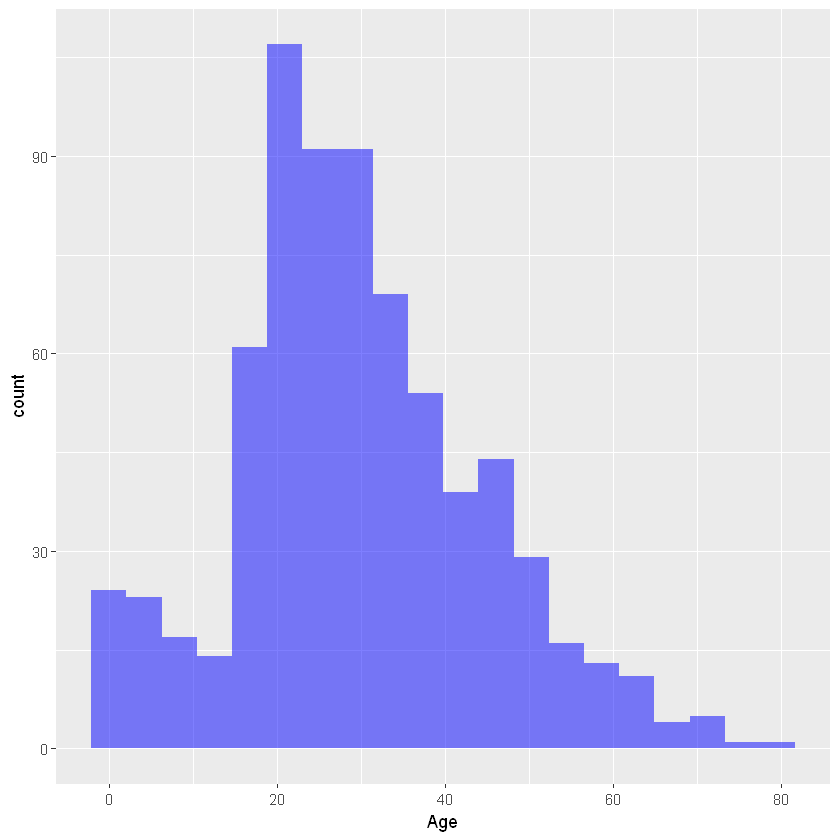

In [14]:
ggplot(df.train,aes(Age))+geom_histogram(fill='blue',bins=20,alpha=0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

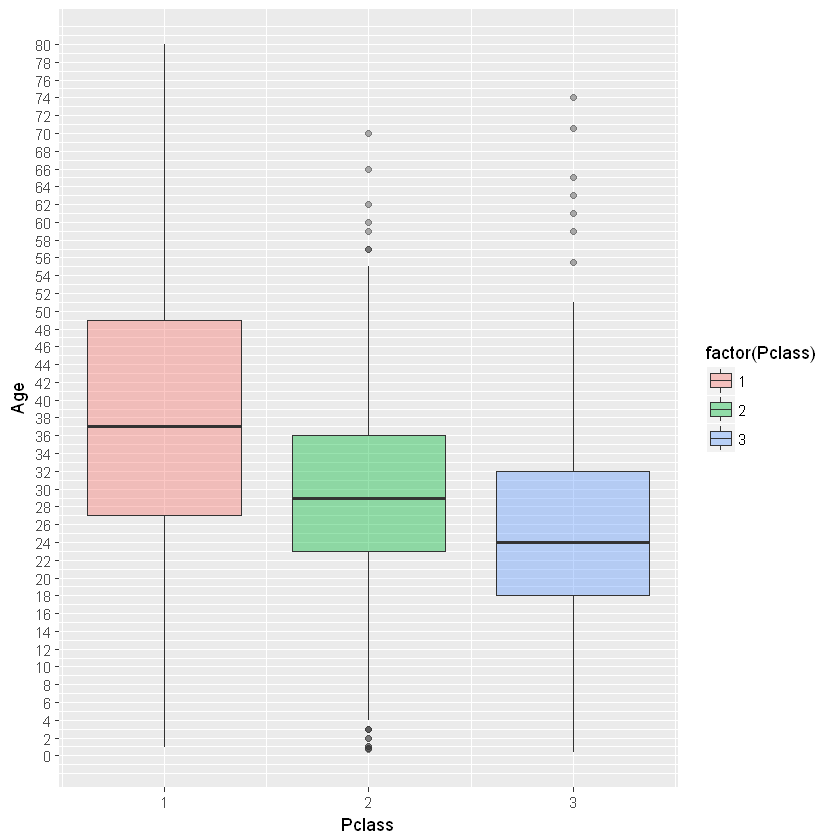

In [15]:
pl <- ggplot(df.train,aes(Pclass,Age))+geom_boxplot(aes(group=Pclass,fill=factor(Pclass)),alpha=0.4)
pl+scale_y_continuous(breaks=seq(min(0),max(80), by =2))

In [16]:
#IMPUTE AGE
impute_age <- function(age,class){
    out <- age
    for(i in 1:length(age)){
        if (is.na(age[i])){
            if (class[i]==1){
                out[i]=37
            }
            else if (class[i]==2){
                out[i]=29
            }
            else{
                out[i]=23
            }
        }
        else{
            out[i]=age[i]
        }
    }
    return (out)
}

In [17]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)


In [18]:
df.train$Age <- fixed.ages

In [19]:
colSums(is.na(df.train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

In [20]:
df.train <- na.omit(df.train)

In [21]:
df.train <- subset(df.train, select = -c(PassengerId,Cabin,Name,Ticket))

In [22]:
head(df.train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,1,female,38,1,0,71.2833,C
4,1,1,female,35,1,0,53.1000,S
7,0,1,male,54,0,0,51.8625,S
11,1,3,female,4,1,1,16.7000,S
12,1,1,female,58,0,0,26.5500,S
22,1,2,male,34,0,0,13.0000,S


In [23]:
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

In [27]:
log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = df.train)

In [28]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7909  -0.7900   0.2858   0.5437   2.0991  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.476854   0.966294   4.633 3.60e-06 ***
Pclass2       0.122000   0.844512   0.144   0.8851    
Pclass3      -1.478449   0.937168  -1.578   0.1147    
Sexmale      -3.012990   0.506158  -5.953 2.64e-09 ***
Age          -0.038547   0.015297  -2.520   0.0117 *  
SibSp1        0.431387   0.417625   1.033   0.3016    
SibSp2        0.900945   1.765355   0.510   0.6098    
SibSp3       -0.904394   1.728770  -0.523   0.6009    
Parch1       -0.317303   0.545479  -0.582   0.5608    
Parch2       -0.646293   0.730646  -0.885   0.3764    
Parch4      -13.825764 882.743802  -0.016   0.9875    
Fare          0.001278   0.002924   0.437   0.6621    
EmbarkedQ    -1.900649   1.636124  -1.162   0.2454    
EmbarkedS